## Data prepapration

In [1]:
import tflearn.datasets.oxflower17 as oxflower17
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
Colocations handled automatically by placer.


In [2]:
# load data
x, y = oxflower17.load_data(one_hot=True)

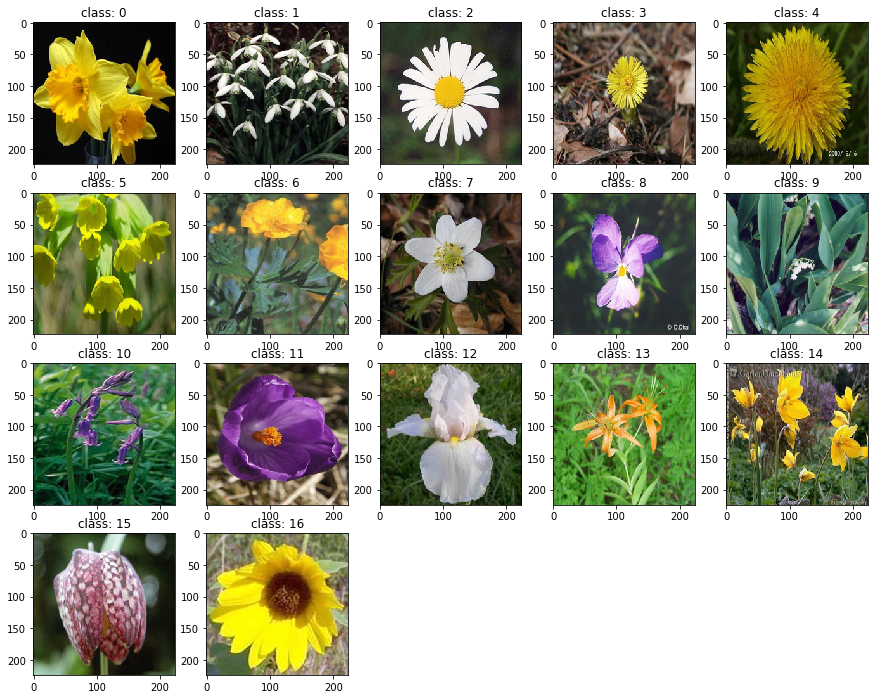

In [3]:
# sample view
plt.figure(figsize=(15,12))
for i in range(17):
    plt.subplot(4,5,i+1)
    index = (y.argmax(axis=1)==i).argmax()
    plt.imshow(x[index])
    plt.title('class: %i' %i)

In [4]:
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=42)
del x, y

In [5]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1224, 224, 224, 3)
(136, 224, 224, 3)
(1224, 224, 224, 3)
(136, 224, 224, 3)
(1224, 17)
(136, 17)


In [6]:
width = 224
height = 224
channel = 3
num_classes = 17
in_shape= (width, height, channel)

## Model definition
**ZF NET**
![](https://cdn-images-1.medium.com/max/1500/1*bFjBVvUL2Po_p2mKzC4iYQ.png)

In [7]:
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


In [28]:
zfnet = Sequential()
zfnet.add(Conv2D(96, (7,7), strides=(2,2), padding='same', activation='relu', input_shape=in_shape, name='CONV1'))
zfnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), name='mPOOL1'))
zfnet.add(Conv2D(256, (5,5), strides=(2,2), activation='relu', name='CONV2'))
zfnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding='same', name='mPOOL2'))
zfnet.add(Conv2D(384, (3,3), padding='same', activation='relu', name='CONV3'))
zfnet.add(Conv2D(384, (3,3), padding='same', activation='relu', name='CONV4'))
zfnet.add(Conv2D(256, (3,3), padding='same', activation='relu', name='CONV5'))
zfnet.add(MaxPool2D(pool_size=(3,3), strides=(2,2), name='mPOOL3'))
zfnet.add(Flatten(name='FLATTEN1'))
zfnet.add(Dense(units=512, activation='relu', name='FC1')) # original units = 4096
zfnet.add(Dropout(rate=0.2, name='DROP1'))
zfnet.add(Dense(units=128, activation='relu', name='FC2')) # original units = 4096
zfnet.add(Dropout(rate=0.2, name='DROP2'))
zfnet.add(Dense(units=num_classes, activation='softmax', name='OUTPUT')) # original units = 1000

zfnet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 112, 112, 96)      14208     
_________________________________________________________________
mPOOL1 (MaxPooling2D)        (None, 55, 55, 96)        0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 26, 26, 256)       614656    
_________________________________________________________________
mPOOL2 (MaxPooling2D)        (None, 13, 13, 256)       0         
_________________________________________________________________
CONV3 (Conv2D)               (None, 13, 13, 384)       885120    
_________________________________________________________________
CONV4 (Conv2D)               (None, 13, 13, 384)       1327488   
_________________________________________________________________
CONV5 (Conv2D)               (None, 13, 13, 256)       884992    
__________

In [29]:
zfnet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

In [24]:
# for visualization
from keras.callbacks import TensorBoard
tensorboard = TensorBoard(log_dir="TFlogs")

In [31]:
EPOCHS = 15
BATCH_SIZE = 128
his = zfnet.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=1,
                validation_data=(x_test, y_test),
                callbacks=[tensorboard]
               )
# for tensorboard visualization
# open terminal and run
# tensorboard --logdir='path/to/current/TFlogs'

Train on 1224 samples, validate on 136 samples
Epoch 1/15
1224/1224 [==============================] - 6s 5ms/step - loss: 2.1512 - acc: 0.2255 - val_loss: 2.1258 - val_acc: 0.3309
Epoch 2/15
1224/1224 [==============================] - 6s 5ms/step - loss: 2.0091 - acc: 0.2819 - val_loss: 1.9065 - val_acc: 0.3676
Epoch 3/15
1224/1224 [==============================] - 6s 5ms/step - loss: 1.8523 - acc: 0.3440 - val_loss: 1.7786 - val_acc: 0.4118
Epoch 4/15
1224/1224 [==============================] - 6s 5ms/step - loss: 1.7393 - acc: 0.4060 - val_loss: 2.1022 - val_acc: 0.3456
Epoch 5/15
1224/1224 [==============================] - 6s 5ms/step - loss: 1.7268 - acc: 0.3995 - val_loss: 1.6925 - val_acc: 0.4265
Epoch 6/15
1224/1224 [==============================] - 6s 5ms/step - loss: 1.5862 - acc: 0.4412 - val_loss: 1.5256 - val_acc: 0.4412
Epoch 7/15
1224/1224 [==============================] - 6s 5ms/step - loss: 1.4004 - acc: 0.5016 - val_loss: 1.4941 - val_acc: 0.5221
Epoch 8/15
1224

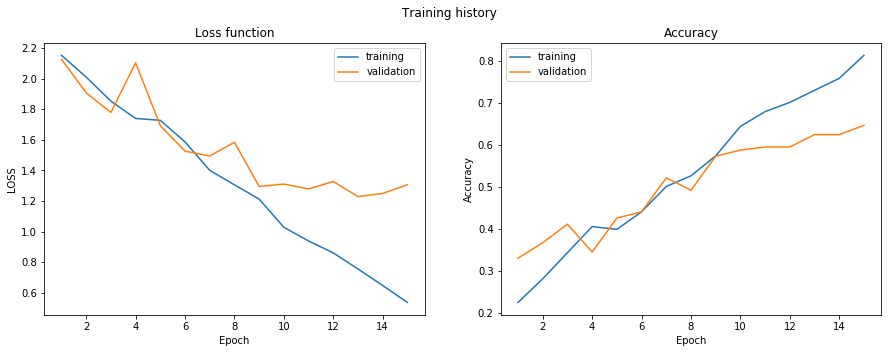

In [32]:
# another way to visualize when finish

epoch = list(range(1, EPOCHS+1))
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epoch, his.history['loss'], label='training')
plt.plot(epoch, his.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.title('Loss function')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, his.history['acc'], label='training')
plt.plot(epoch, his.history['val_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.suptitle('Training history')
plt.show()

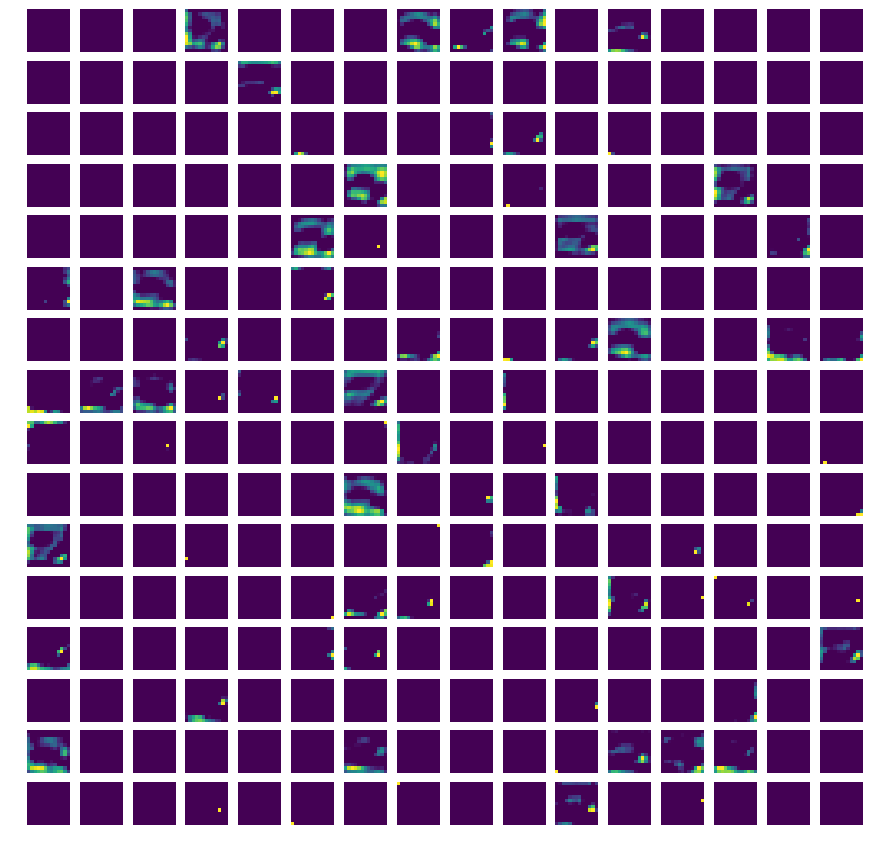

In [33]:
# Visualize 16 filters of CONV5:
from keras.models import Model
import numpy as np
intermediate_layer_model = \
    Model(inputs=zfnet.input, outputs=zfnet.get_layer("CONV5").output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(x_train[20],axis=0))
plt.figure(figsize=(15,15),)
for i in range(256):
    plt.subplot(16,16,i+1) 
    # plt.subplots_adjust(left  = 0.125 ,right = 0.9 , bottom = 0.1,top = 0.9  ,wspace = 0.5 ,hspace = 0.5 )
    plt.axis("off")
    # plt.title("%i" %(i+1))
    im = intermediate_output[:,:,:,i]
    plt.imshow(np.squeeze(im))